In [34]:
import numpy as np
import pandas as pd
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import  mean_squared_error, mean_absolute_error
import joblib

In [35]:
all_subjects = ['Civics', 'Basic Mathematics', 'History', 'Geography', 'Kiswahili', 'English Language',  'Chemistry', 'Bilogy', 'Physics', 'Agriculture', 'Franch', 'Neutrition', 'Commerce', 'Computer,', 'Economics', 'Advance Mathematics', '--']
exam_type_markers= ['internal', 'external']
exam_type = ['mid-term', 'terminal', 'Annual', 'Mock', 'Final']
student_class = [1,2,3,4,5,6]

In [36]:
student_details = {'subject':[], 'exam_type':[], 'exam_type_markers':[], 'class':[],
 'hours_of_studying':[], 'participation_in_group':[], 'group_parlagrims':[],
  'individual_paralligms':[], 'assigments_individual':[], 'assigments_group':[],
 'previous_marks':[], 'panctuality':[], 'Predicted Marks':[]}

In [37]:
for i in range(0, 10000):
    subject_selected = random.choice(all_subjects)
    exam_type_selected = random.choice(exam_type)
    exam_type_markers_selected = random.choice(exam_type_markers)
    student_class_selected = random.choice(student_class)
    if student_class_selected%2 == 1:
        exam_type_index = random.randint(0,2)
        exam_type_selected = exam_type[exam_type_index]
        exam_type_markers = 'internal'
    previous_marks_selected = random.randint(0,100)
    no_days = random.randint(30, (6*365)+1)
    studying_time_day = random.randint(0,no_days)

    hours_of_studying_selected = (studying_time_day/no_days)*100
    total_tasks = random.randint(1,10)
    tasks_done = random.randint(0,total_tasks)
    
    participation_in_group_selected = (tasks_done/total_tasks) *100
    no_assigments_group = random.randint(1,10)
    group_parlagrims_rry = []
    group_parlagrims_selected = 0
    if no_assigments_group>1:
        for i in range(no_assigments_group):
            palarism = random.randint(0,100)
            group_parlagrims_rry.append(palarism)
        group_parlagrims_selected = sum(group_parlagrims_rry)/no_assigments_group

    no_assigments_individual = random.randint(1,10)
    individual_parlagrims_rry = []
    individual_parlagrims_selected = 0
    if no_assigments_individual>1:
        for i in range(no_assigments_individual):
            palarism = random.randint(0,100)
            individual_parlagrims_rry.append(palarism)
        individual_parlagrims_selected = sum(individual_parlagrims_rry)/no_assigments_individual
    panctuality_arry = []
    group_assigment_rry = []
    group_assigment_selected = 0
    submission_status = ['late', 'on time']
    if no_assigments_group>1:
        for i in range(no_assigments_group):
            weight = random.randint(0,100)
            submission_status_selected =random.choice(submission_status)
            if submission_status_selected == 'on time':
                panctuality_arry.append(1)
            group_assigment_rry.append(weight)
        group_assigment_selected = sum(group_assigment_rry)/no_assigments_group

    no_assigments_individual = random.randint(0,10)
    individual_assigment_rry = []
    weight_arr = []
    individual_assigment_selected = 0
    if no_assigments_individual>1:
        for i in range(no_assigments_individual):
            weight = random.randint(0,100)
            weight_arr.append(weight)
            individual_assigment_rry.append(weight)
            submission_status_selected =random.choice(submission_status)
            if submission_status_selected == 'on time':
                panctuality_arry.append(1)
        individual_assigment = sum(individual_assigment_rry)/(no_assigments_individual*sum(weight_arr)/len(weight_arr))
        
        individual_assigment_selected =individual_assigment
    panctuality_selected = (sum(panctuality_arry)/(no_assigments_group + no_assigments_individual))*100
    student_details['subject'].append(subject_selected)
    student_details['exam_type'].append(exam_type_selected)
    student_details['exam_type_markers'].append(exam_type_markers_selected)
    student_details['class'].append(student_class_selected)
    student_details['hours_of_studying'].append(hours_of_studying_selected)
    student_details['participation_in_group'].append(participation_in_group_selected)
    student_details['group_parlagrims'].append(group_parlagrims_selected)
    student_details['individual_paralligms'].append(individual_parlagrims_selected)
    student_details['assigments_individual'].append(group_assigment_selected)
    student_details['assigments_group'].append(group_assigment_selected)
    student_details['panctuality'].append(panctuality_selected)
    student_details['previous_marks'].append(previous_marks_selected)
    
    Predicted_Marks_selected = exam_type.index(exam_type_selected)*0.05 + (6-student_class_selected)*0.15 + hours_of_studying_selected*0.15 + participation_in_group_selected*0.15 - group_parlagrims_selected*0.2 -individual_parlagrims_selected*0.2 + previous_marks_selected*0.2 +panctuality_selected*0.15
    if Predicted_Marks_selected >99:
        Predicted_Marks_selected = random.randint(90,99)
    student_details['Predicted Marks'].append(int(Predicted_Marks_selected))
        

In [38]:
data = pd.DataFrame(student_details)
data.head()

,subject,exam_type,exam_type_markers,class,hours_of_studying,participation_in_group,group_parlagrims,individual_paralligms,assigments_individual,assigments_group,previous_marks,panctuality,Predicted Marks
0,Bilogy,mid-term,internal,1,37.500000,57.142857,33.333333,50.250000,51.444444,51.444444,21,72.222222,13
1,"Computer,",Mock,e,6,69.427609,14.285714,0.000000,44.375000,0.000000,0.000000,12,20.000000,9
2,Chemistry,terminal,i,3,86.526123,0.000000,54.750000,50.000000,44.500000,44.500000,48,16.666667,4
3,History,Final,i,6,58.359621,20.000000,49.800000,72.333333,46.000000,46.000000,66,50.000000,8
4,Commerce,terminal,i,3,10.298742,28.571429,59.300000,45.666667,44.700000,44.700000,96,55.000000,12


In [39]:
class_mapping = {value:index for index, value in enumerate(data['subject'].unique())}
class_mapping
{'Neutrition': 0, 'Commerce': 1, 'Computer,': 2, 'Civics': 3, 'Physics': 4, 'History': 5, 'Agriculture': 6, 'Basic Mathematics': 7, 'Franch': 8, 'Kiswahili': 9, 'Bilogy': 10, 'Chemistry': 11, 'Geography': 12, 'Advance Mathematics': 13, 'English Language': 14, 'Economics': 15}

{'Neutrition': 0,
 'Commerce': 1,
 'Computer,': 2,
 'Civics': 3,
 'Physics': 4,
 'History': 5,
 'Agriculture': 6,
 'Basic Mathematics': 7,
 'Franch': 8,
 'Kiswahili': 9,
 'Bilogy': 10,
 'Chemistry': 11,
 'Geography': 12,
 'Advance Mathematics': 13,
 'English Language': 14,
 'Economics': 15}

In [40]:
class_mapping = {value:index for index, value in enumerate(data['subject'].unique())}
data['subject']= data['subject'].map(class_mapping)
class_mapping = {value:index for index, value in enumerate(data['exam_type'].unique())}
data['exam_type']= data['exam_type'].map(class_mapping)
class_mapping = {value:index for index, value in enumerate(data['exam_type'].unique())}
data['exam_type']= data['exam_type'].map(class_mapping)

In [41]:
data.drop('exam_type_markers', axis=1, inplace=True)

In [42]:
data.isna().sum()

subject                   0
exam_type                 0
class                     0
hours_of_studying         0
participation_in_group    0
group_parlagrims          0
individual_paralligms     0
assigments_individual     0
assigments_group          0
previous_marks            0
panctuality               0
Predicted Marks           0
dtype: int64

In [43]:
data.drop_duplicates(inplace=True)

In [44]:
data.corr()

,subject,exam_type,class,hours_of_studying,participation_in_group,group_parlagrims,individual_paralligms,assigments_individual,assigments_group,previous_marks,panctuality,Predicted Marks
subject,1.000000,-0.017181,-0.007989,-0.013489,-0.020341,0.010577,-0.007714,0.000697,0.000697,0.011374,0.000468,-0.010477
exam_type,-0.017181,1.000000,0.025774,-0.006876,0.005254,0.003531,-0.003600,0.015235,0.015235,0.014441,0.014497,0.014225
class,-0.007989,0.025774,1.000000,-0.009278,-0.005152,-0.003138,-0.011753,-0.009632,-0.009632,-0.014963,0.005140,-0.030834
hours_of_studying,-0.013489,-0.006876,-0.009278,1.000000,-0.025188,-0.001085,-0.018285,-0.002676,-0.002676,-0.004868,-0.003513,0.394438
participation_in_group,-0.020341,0.005254,-0.005152,-0.025188,1.000000,0.003558,0.007346,0.012412,0.012412,-0.010979,-0.005027,0.488662
group_parlagrims,0.010577,0.003531,-0.003138,-0.001085,0.003558,1.000000,-0.006546,0.574800,0.574800,0.013527,0.187162,-0.311260
individual_paralligms,-0.007714,-0.003600,-0.011753,-0.018285,0.007346,-0.006546,1.000000,-0.000895,-0.000895,-0.003587,-0.001091,-0.375764
assigments_individual,0.000697,0.015235,-0.009632,-0.002676,0.012412,0.574800,-0.000895,1.000000,1.000000,0.008197,0.184587,-0.156219
assigments_group,0.000697,0.015235,-0.009632,-0.002676,0.012412,0.574800,-0.000895,1.000000,1.000000,0.008197,0.184587,-0.156219
previous_marks,0.011374,0.014441,-0.014963,-0.004868,-0.010979,0.013527,-0.003587,0.008197,0.008197,1.000000,0.007117,0.531952


In [45]:
data.to_csv('student marks.csv', index=True)

In [46]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [48]:
tree = DecisionTreeRegressor()

In [49]:
tree.fit(x,y)

DecisionTreeRegressor()

In [50]:
dictt = pd.DataFrame(tree.feature_importances_)

In [51]:
dictt.index = x.columns

<AxesSubplot:>

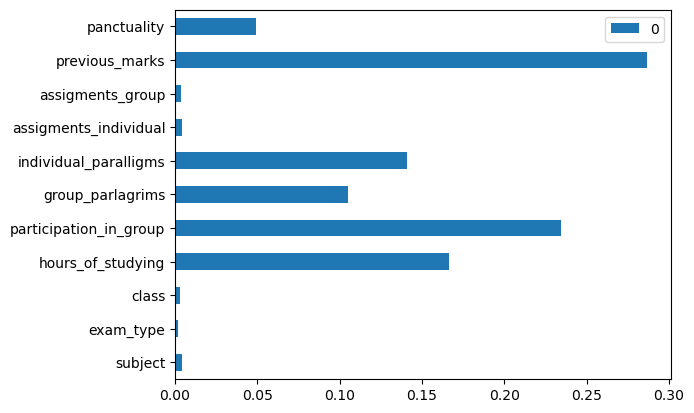

In [52]:

dictt.plot.barh()

In [53]:
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
y_predicted = tree.predict(x_test)

In [55]:
mean_squared_error(y_true=y_test, y_pred=y_predicted)

19.079

In [56]:
mean_absolute_error(y_true=y_test, y_pred=y_predicted)

3.409

In [57]:
joblib.dump(tree, open('studentmarks.pkl', 'wb'))

In [58]:
loaded_moddel = joblib.load(open('studentmarks.pkl', 'rb'))

In [59]:
y_predicted = loaded_moddel.predict(x_test)

In [60]:
mean_absolute_error(y_test, y_predicted)

3.409

In [61]:
import string

In [62]:
for index, value in enumerate(string.punctuation):
    print('index no : ', index, 'value: ', value)

index no :  0 value:  !
index no :  1 value:  "
index no :  2 value:  #
index no :  3 value:  $
index no :  4 value:  %
index no :  5 value:  &
index no :  6 value:  '
index no :  7 value:  (
index no :  8 value:  )
index no :  9 value:  *
index no :  10 value:  +
index no :  11 value:  ,
index no :  12 value:  -
index no :  13 value:  .
index no :  14 value:  /
index no :  15 value:  :
index no :  16 value:  ;
index no :  17 value:  <
index no :  18 value:  =
index no :  19 value:  >
index no :  20 value:  ?
index no :  21 value:  @
index no :  22 value:  [
index no :  23 value:  \
index no :  24 value:  ]
index no :  25 value:  ^
index no :  26 value:  _
index no :  27 value:  `
index no :  28 value:  {
index no :  29 value:  |
index no :  30 value:  }
index no :  31 value:  ~
